# Montecarlo-simulation with a while loop

Montecarlo is a method of forecasting stockprice and risk. We'll use our own defined formula with two components: stochastic simulation and deterministic drift component.

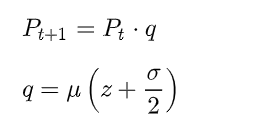


Where q is a percent of change, mu is the mean logarithimic return of the asset, z is a random process and sigma/2 is the drift. This equation qives us a stochastic price for tomorrow, but we want to forecast deeper in to the future. Therefore we modify this equation by taking the natural logarithm of mu, beacause the product of logartihms is equal to the sum of the logarithms. This simplifies the process.


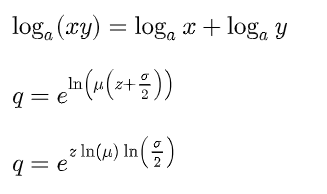

In [2]:
#imports
import yfinance as yf
import numpy as np
import random
import datetime as datetime
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from itertools import accumulate


In [6]:
#defining our loop

def montecarloop(itera=1000,my=1,walks=252,p0=1,sigma=0):
        #params:
        ##   itera=number of iterations 
        ##   my=mean of returns
        ##   walks=no. of timesteps
        ##   std of returns
            
        ##model is confined to dailytimeframe eg. 252 days / 100 days...
        u=np.log(my+1)
        drift=sigma/2
            
        e=pd.date_range(start=datetime.datetime.today()+datetime.timedelta(days = 1),end=datetime.datetime.today()+datetime.timedelta(days = walks),freq='d')
        mastercount=0
        
        while mastercount<=itera:
            count=0
            a=[]
            while count < walks:
                a.append((random.uniform(-1, 1)+np.log(1+drift)*u))
                count+=1
            if mastercount<1:
                df=pd.DataFrame({'date':e, str(mastercount):a})
                mastercount+=1
            elif mastercount==itera:
                i=pd.DataFrame({'date':e, str(mastercount):a})
                df=df.merge(i)
                mastercount+=1
                df.set_index('date', inplace=True)
            else:
                i=pd.DataFrame({'date':e, str(mastercount):a})
                df=df.merge(i)
                mastercount+=1
                
        # summing up returns
        returns=[]
        
        df=df.cumsum()
        
        for i in range (0,itera):
            returns.append(df[str(i)].iloc[-1])

        for t in returns:
            np.exp(t)+drift*my
        
       
        #prev=0
        #for i in range (0,itera):
            #for k in df[str(i)]:
                #prev+=k
                #prev
            
        
            
        mean_fv=np.exp(np.mean(returns))*p0
        
        fv_std=np.std(returns)
        
        
        
        return df , mean_fv , fv_std
        
        
            

In [4]:
tic=yf.Ticker('AAPL')
frame=tic.history('max')

m=frame['Close'].pct_change().mean()
p=frame['Close'].iloc[-1]
s=frame['Close'].pct_change().std()*100/np.sqrt(len(frame['Close']))

In [10]:
# example of use

df, mean_fv, fv_std=montecarloop(itera=2500,my=m,walks=252,p0=p,sigma=s)

print('most probable price', mean_fv,'with standard deviation of ',fv_std)

most probable price 181.36109377951874 with standard deviation of  9.164867609774067


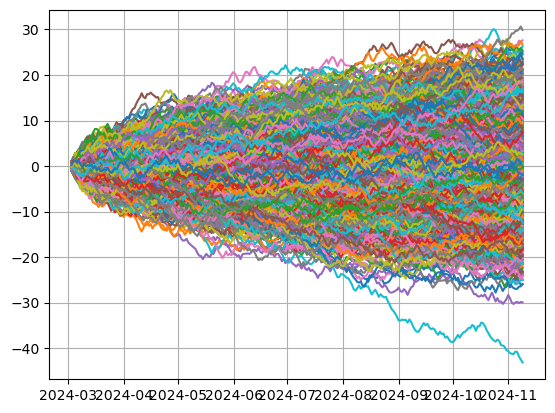

In [15]:
# graph examples

#graph the montecarlo process

plt.plot(df)
plt.grid(True)
plt.show()


#plot the pdf of price range

x=np.arange(-3,3,100)

def probdistfunc(x,u,std):
    np.exp(-1/2*((x-u)/std)**2)/(std*2*np.sqrt(np.pi))
